## 导包和数据预处理

In [1]:
import tensorflow as tf
from tensorflow.python import keras

import numpy as np

print(np.__version__)

print(tf.__version__)

1.16.2
2.0.0-alpha0


In [2]:
'''切分数据集为训练集和测试集'''
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data('imdb.npz',num_words=15000)

In [3]:
'''查看训练集的样本数量'''

print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [4]:
'''文本都被转换乘int了，一个int对应的就是一个文字'''

# 看看第一句的组成
print(train_data[0]) 
# 查第一句和第二句个各有多长
print('len: ',len(train_data[0]), len(train_data[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
len:  218 189


In [5]:
'''定义解码规则 把int重新根据字典转化为中文文本'''

# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])



'''查看解码后的文字是怎么样的'''

decode_review(train_data[20])

"<START> shown in australia as <UNK> this incredibly bad movie is so bad that you become <UNK> and have to watch it to the end just to see if it could get any worse and it does the storyline is so predictable it seems written by a high school <UNK> class the sets are pathetic but marginally better than the <UNK> and the acting is wooden br br the infant <UNK> seems to have been stolen from the props <UNK> of <UNK> <UNK> there didn't seem to be a single original idea in the whole movie br br i found this movie to be so bad that i laughed most of the way through br br malcolm mcdowell should hang his head in shame he obviously needed the money"

In [6]:
'''准备结构化数据用于模型训练'''

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
# 查看此时的训练数据
len(train_data[0]), len(train_data[1])

(256, 256)

In [7]:
'''查看结构化后的数据是什么形状的'''

train_data.shape,test_data.shape # 结构化的数据使每个句子都是256个字，多的就补0

((25000, 256), (25000, 256))

# 建立模型

In [8]:
# 输入的vocab_sice指的是字典中的单词量
vocab_size = 15000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
#model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          240000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 240,289
Trainable params: 240,289
Non-trainable params: 0
_________________________________________________________________


In [9]:
'''专业级建模'''

from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling1D, Embedding
from tensorflow.keras import Model

class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.embed = Embedding(vocab_size, 16)
    self.pool = GlobalAveragePooling1D()
    self.d1 = Dense(16, activation=tf.nn.relu)
#     self.dropout = Dropout(0.5)
    self.d2 = Dense(1, activation=tf.nn.softmax)

  def call(self, x):
    x = self.embed(x)
    x = self.pool(x)
    x = self.d1(x)
    return self.d2(x)

mymodel = MyModel()



In [11]:
'''选择合适的优化器和损失函数'''

model.compile(optimizer='Adam',
              loss='binary_crossentropy',  # 采用常用的交叉熵损失函数
              metrics=['accuracy'])

In [12]:
'''从训练集中拆分出验证集，用于可视化训练过程'''

# 为什么不用测试集？因为我们目标是只用train集训练模型最后用test来验证模型的泛化能力

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## 训练模型

In [15]:
'''训练模型之log记录，遍历训练数据20次，minibatch为512，引入sklearn来记录分数'''

#每一Epochs都进行F1计算
import numpy as np
from keras.callbacks import Callback
from keras.engine.training import Model
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []
 
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict,average='weighted')
        _val_recall = recall_score(val_targ, val_predict,average='weighted')
        _val_precision = precision_score(val_targ, val_predict,average='weighted')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print( ' — val_f1: %f — val_precision: %f — val_recall %f' %(_val_f1, _val_precision, _val_recall))
        return
    
metrics = Metrics()
metrics

In [16]:
'''实际训练模型'''

from keras.callbacks import EarlyStopping
earlystopping=keras.callbacks.EarlyStopping(monitor='val_acc', patience=8, verbose=0, mode='max')

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=90,
                    batch_size=512,
                    validation_data=(x_val, y_val),
#                     callbacks=[metrics,earlystopping],
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/90
15000/15000 [==============================] - 3s 224us/sample - loss: 0.6921 - accuracy: 0.5531 - val_loss: 0.6906 - val_accuracy: 0.6780
Epoch 2/90
15000/15000 [==============================] - 1s 97us/sample - loss: 0.6882 - accuracy: 0.6353 - val_loss: 0.6855 - val_accuracy: 0.7045
Epoch 3/90
15000/15000 [==============================] - 1s 96us/sample - loss: 0.6808 - accuracy: 0.6766 - val_loss: 0.6762 - val_accuracy: 0.7430
Epoch 4/90
15000/15000 [==============================] - 2s 101us/sample - loss: 0.6674 - accuracy: 0.7125 - val_loss: 0.6600 - val_accuracy: 0.7618
Epoch 5/90
15000/15000 [==============================] - 1s 99us/sample - loss: 0.6456 - accuracy: 0.7301 - val_loss: 0.6360 - val_accuracy: 0.7830
Epoch 6/90
15000/15000 [==============================] - 1s 97us/sample - loss: 0.6175 - accuracy: 0.7505 - val_loss: 0.6048 - val_accuracy: 0.7906
Epoch 7/90
15000/15000 [==============================

15000/15000 [==============================] - 1s 98us/sample - loss: 0.0835 - accuracy: 0.9788 - val_loss: 0.3358 - val_accuracy: 0.8831
Epoch 56/90
15000/15000 [==============================] - 1s 98us/sample - loss: 0.0806 - accuracy: 0.9785 - val_loss: 0.3417 - val_accuracy: 0.8815
Epoch 57/90
15000/15000 [==============================] - 1s 97us/sample - loss: 0.0785 - accuracy: 0.9814 - val_loss: 0.3444 - val_accuracy: 0.8819
Epoch 58/90
15000/15000 [==============================] - 1s 96us/sample - loss: 0.0785 - accuracy: 0.9809 - val_loss: 0.3489 - val_accuracy: 0.8804
Epoch 59/90
15000/15000 [==============================] - 1s 99us/sample - loss: 0.0764 - accuracy: 0.9799 - val_loss: 0.3520 - val_accuracy: 0.8805
Epoch 60/90
15000/15000 [==============================] - 1s 98us/sample - loss: 0.0715 - accuracy: 0.9819 - val_loss: 0.3561 - val_accuracy: 0.8799
Epoch 61/90
15000/15000 [==============================] - 1s 98us/sample - loss: 0.0729 - accuracy: 0.9809 - va

## 评价模型

In [18]:
'''用测试集评价模型'''

results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 36us/sample - loss: 0.5460 - accuracy: 0.8611
[0.5460239705562592, 0.86108]


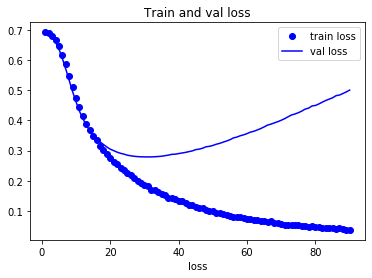

In [20]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='train loss')
plt.plot(epochs, val_loss, 'b', label='val loss')
plt.title('Train and val loss')
plt.xlabel('Epochs')
plt.xlabel('loss')
plt.legend()
plt.show()

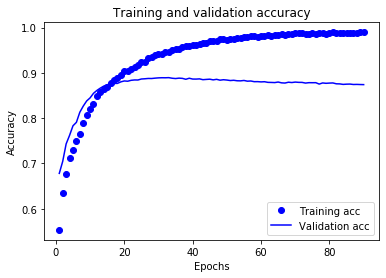

In [21]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()